<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/Examen1_PonceEliet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su **capacidad de interpretar los resultados**. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (3.4 puntos)

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

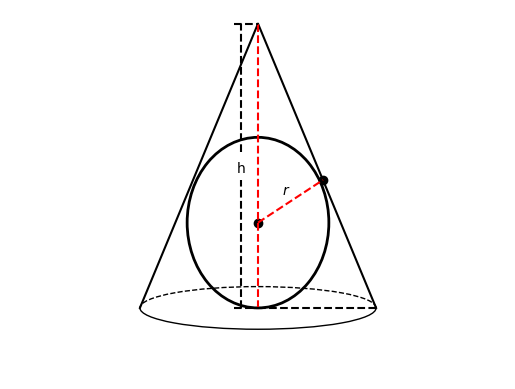

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (1.4 puntos)

R = radio cono \
r = radio esfera
$$V=\frac{\pi R^2h}{3}$$
$$\frac{R}{r}= \frac{h}{\sqrt(h(h-2r))}$$
$$R^2=\frac{r^2 h}{h-2r}$$
$$V(h)=\frac{\pi r^2}{3}*\frac{h^2}{h-2r}$$


2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$. (1 punto)

In [4]:
import sympy as sym
from sympy import pi

h=sym.Symbol('h')
r = 2
V=(pi*r**2/3)*((h**2)/(h-2*r))
derV=sym.diff(V,h)
sol=sym.solve(derV,h)
sol

[0, 8]

3. ¿Cuál es el área mínima del cono? (1 punto)

In [1]:
import sympy as sym
from sympy import pi

r=2
hmin=8
R2=(r**2*hmin)/(hmin-2*r)
Rb=sym.sqrt(R2)
L=sym.sqrt(R2+hmin**2)
Amin=pi*Rb*(Rb+L)
Amin



32.0*pi

---
# Segundo punto. Programación lineal (3.4 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(2.2 puntos)}
\end{equation}

Tres marcas de Dulces: M1, M2, M3 \
Compra marcas (u. m.): M1=3, M2=2, M3=1 \
Importar: M1=2000, M2=4000, M3=1000 \
Tres productos: P1, P2, P3 \
Composición: P1 = M1>80 M3<20, P2 = M1>20 M3<80, P3 = M3>70 \
Venta productos (u. m.): P1=4, P2=3, P1=2 \
Compra: P1=3, P2=2, P3=1 \
$x_{ij}$ = Cantidad de la marca $i$ en el producto $j$.
\
\
$i$ = 1, 2, 3 (M1, M2, M3)\
$j$ = 1, 2, 3 (P1, P2, P3)\
$$y_j = \sum_{i=1}^{3} x_{ij}$$

$$P1=4y_1$$
$$P2=3y_2$$
$$P1=2y_3$$

$$M1= 3 \sum_{j=1} x_{1j}$$
$$M2= 2 \sum_{j=1} x_{2j}$$
$$M3= 1 \sum_{j=1} x_{3j}$$

$$Beneficio (B)= 4y_1 + 3y_2 + 2y_3 - (3 \sum_{j=1} x_{1j} + 2 \sum_{j=1} x_{2j} + 1 \sum_{j=1} x_{3j})$$
Con costos
$$B=\sum_{i=1}^{3} \sum_{j=1}^{3}  c_{ij} x_{ij}$$
\
$$c_{ij} =
\begin{pmatrix}
4-3 & 3-3 & 2-3 \\
4-2 & 3-2 & 2-2 \\
4-1 & 3-1 & 2-1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & -1 \\
2 & 1 & 0 \\
3 & 2 & 1
\end{pmatrix}
$$

$$B = 1\,x_{11} + 0\,x_{12} - 1\,x_{13} + 2\,x_{21} + 1\,x_{22} + 0\,x_{23} + 3\,x_{31} + 2\,x_{32} + 1\,x_{33}$$
$$Minimizar: Z = -B$$

$$Restricciones:\begin{cases}
x_{11} + x_{12} + x_{13} \le 2000,\\
x_{21} + x_{22} + x_{23} \le 4000,\\
x_{31} + x_{32} + x_{33} \le 1000.
\end{cases}$$

$$P1=x_{11} \ge 0.8 \,(x_{11} + x_{21} + x_{31}),
x_{31} \le 0.2 \,(x_{11} + x_{21} + x_{31})$$
$$P2=x_{12} \ge 0.2 \,(x_{12} + x_{22} + x_{32}),
x_{32} \le 0.8 \,(x_{12} + x_{22} + x_{32})$$
$$P3=x_{33} \le 0.7 \,(x_{13} + x_{23} + x_{33})$$
\
$$x_{ij} \ge 0$$











2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (1.2 puntos)

In [13]:
import numpy as np
from scipy.optimize import linprog
import scipy.optimize as opt

c=np.array([-1, -2, -3, 0, -1, -2, 1, 0, -1])
a=np.array([[1,1,1,0,0,0,0,0,0],      #m1
            [0,0,0,1,1,1,0,0,0],      #m2
            [0,0,0,0,0,0,1,1,1],      #m3
                  #P1
            [-0.2, 0, 0, 0.8, 0, 0, 0.8, 0, 0],
            [-0.2, 0, 0,-0.2, 0, 0, 0.8, 0, 0],
                  #P2
            [0, -0.8, 0, 0, 0.2, 0, 0, 0.2, 0],
            [0, -0.8, 0, 0,-0.8, 0, 0, 0.2, 0],
                  #P3
            [0, 0, -0.7, 0, 0, -0.7, 0, 0, 0.3]
])

b=np.array([2000,4000,1000,0,0,0,0,0])
lim=(0,None)
r=linprog(c=c, A_ub=a, b_ub=b,bounds=lim)
max=-r.fun
print(r)
print(max)
print(r.x)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -15000.0
              x: [ 0.000e+00  0.000e+00  2.000e+03  0.000e+00  0.000e+00
                   4.000e+03  0.000e+00  0.000e+00  1.000e+03]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  2.000e+03  0.000e+00
                              0.000e+00  4.000e+03  0.000e+00  0.000e+00
                              1.000e+03]
                 marginals: [ 2.000e+00  1.000e+00  0.000e+00  2.000e+00
                              1.000e+00  0.000e+00  2.000e+00  1.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  

Beneficio Máximo = 1500 u. m. \
Hacer P3

---
# Tercer punto. Ajuste de curvas (3.4 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [4]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

/tmp/ipython-input-1613858795.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')


,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores cuadráticos de forma gráfica, ¿Qué polinómio se ajusta mejor? (2 puntos)

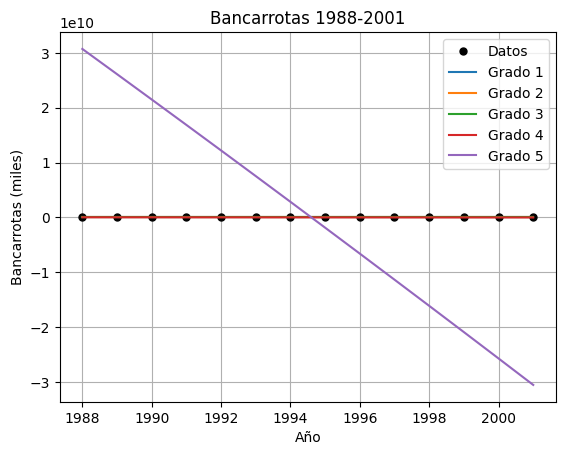

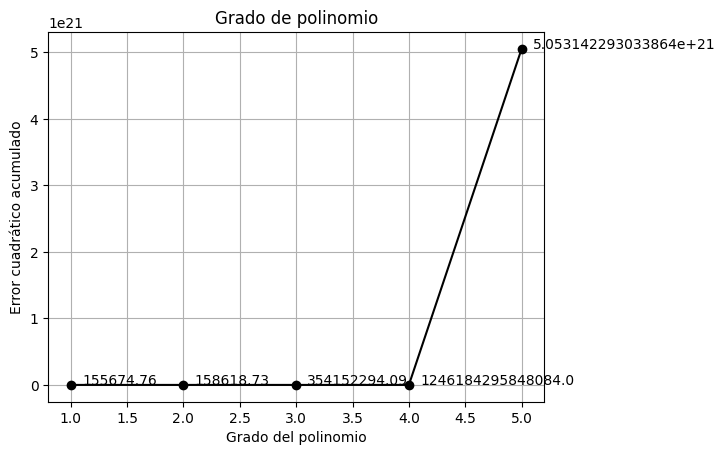

Grado 1 : [-1.27053709e+05  6.42135240e+01]
Grado 2 : [ 5.02673743e-01 -5.95964047e+01  3.01366205e-02]
Grado 3 : [ 3.05338124e-01  6.80646458e-01  5.93331153e-01 -2.97521539e-04]
Grado 4 : [ 3.29998648e-01  2.41569948e-01  5.41810123e-01  5.87811744e-01
 -2.94845275e-04]
Grado 5 : [ 4.48208615e-01  5.95930737e-01  8.55907033e-01  9.13280130e-01
  5.93108109e-01 -2.97586287e-04]


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

years = np.arange(1988, 2002)
bankruptcies = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                         1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])

def fhat(beta, x):
    X = np.array([x**i for i in range(len(beta))]).T
    return X @ beta

def error3(beta, x, y):
    return np.sum((y - fhat(beta, x))**2)

n = 5
sol = []

plt.plot(years, bankruptcies, 'ok', ms=5, label='Datos')

for i in range(1, n+1):
    beta_inicial = np.random.rand(i+1)
    sol.append(opt.minimize(error3, beta_inicial, args=(years, bankruptcies)))
    f = fhat(sol[-1].x, years)
    plt.plot(years, f, label='Grado '+str(i))

plt.xlabel('Año')
plt.ylabel('Bancarrotas (miles)')
plt.title('Bancarrotas 1988-2001')
plt.legend()
plt.grid()
plt.show()

plt.plot([i+1 for i in range(n)], [s.fun for s in sol], 'ok-')
for i in range(n):
    plt.text(i+1.1, sol[i].fun, round(sol[i].fun,2))

plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.title('Grado de polinomio')
plt.grid()
plt.show()

for i in range(n):
    print('Grado', i+1, ':', sol[i].x)


2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.7 puntos)

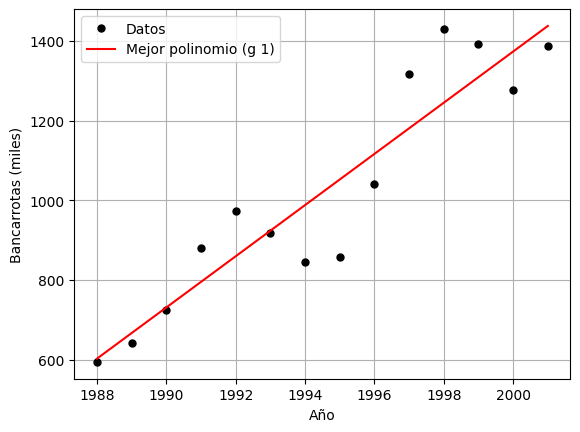

Polinomio mejor: 1
Error cuadrático: 155674.76
Coeficientes: [-1.27053438e+05  6.42133882e+01]


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

years = np.arange(1988, 2002)
bankruptcies = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                         1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])

def fhat(beta, x):
    X = np.array([x**i for i in range(len(beta))]).T
    return X @ beta

def error3(beta, x, y):
    return np.sum((y - fhat(beta, x))**2)

n = 5
sol = []

for i in range(1, n+1):
    beta_inicial = np.random.rand(i+1)
    sol.append(opt.minimize(error3, beta_inicial, args=(years, bankruptcies)))

Mindice = np.argmin([s.fun for s in sol])
Mpol = sol[Mindice]
Mgrad = Mindice + 1

plt.plot(years, bankruptcies, 'ok', ms=5, label='Datos')
plt.plot(years, fhat(Mpol.x, years), 'r', label=f'Mejor polinomio (g {Mgrad})')
plt.xlabel('Año')
plt.ylabel('Bancarrotas (miles)')
plt.legend()
plt.grid()
plt.show()

print(f"Polinomio mejor: {Mgrad}")
print(f"Error cuadrático: {Mpol.fun:.2f}")
print(f"Coeficientes: {Mpol.x}")


3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.7 puntos)

In [31]:
import numpy as np

Xinterp = 1995.5
Xextra = 2020

Binterp = fhat(Mpol.x, np.array([Xinterp]))
Bextra = fhat(Mpol.x, np.array([Xextra]))

print(f"Bancarrotas a mediados de 1995: {Binterp[0]:.2f} mil")
print(f"Predicción 2020: {Bextra[0]:.2f} mil")


Bancarrotas a mediados de 1995: 1084.38 mil
Predicción 2020: 2657.61 mil
